In [132]:
import numpy as np  
#패키지 import
import keras
from keras import models, layers
from keras import backend
from keras import datasets

In [133]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [134]:
import numpy as np
import cv2
import codecs

In [135]:
import tensorflow as tf

In [136]:
def load_glove_model(glove_file):
   

    f = codecs.open(glove_file + ".txt", 'r', encoding='utf-8')
    model = {}
    for line in f:
        split_line = line.split()
        word = split_line[0]
        embedding = np.array([float(val) for val in split_line[1:]])
        model[word] = embedding
    return model

In [137]:
def get_w2v(sentence, model):
    return np.array([model.get(val, np.zeros(100)) for val in sentence.split()], dtype=np.float64)


In [138]:
model_1 = load_glove_model("/home/hamidraei/AMAZON/all.review.vec")

In [139]:
j = 0
i = 0
samples = []
labels = []
X_train = []
while j<2000:
    if j<1000:
        sec = "positive"
        
    else:
        sec = "negative"
        if j==1000:
            i = 0
    try:
        z = codecs.open(f"/home/hamidraei/AMAZON/train/{sec}/{i}", 'r', encoding='utf-8')
        content = z.read()
        content = content[:400]
        samples.append(content)
        if j<1000:
            labels.append([1])
        else:
            labels.append([0])
        kar = True
        j+=1
        i+=1
        for line1 in z:
            
            word = line1.split()
            a = get_w2v(line1, model_1)
        #print(len(word))
        #print(a.shape)
        #print(line1)
            #i+=1
            v, h = a.shape
            if v>200:
                a = a[0:200, :]
            if v<200:
                zg = np.zeros((200-v,100 ))
                a = np.concatenate((a, zg), axis=0)
            X_train.append(a)

    except:
        kar = False
        i+=1
        
    print(f"j is{j}") 
    #print(i)
    

j is0
j is0
j is0
j is0
j is0
j is0
j is0
j is0
j is0
j is1
j is1
j is1
j is1
j is1
j is1
j is1
j is1
j is2
j is2
j is2
j is3
j is3
j is4
j is4
j is5
j is5
j is5
j is6
j is7
j is8
j is8
j is9
j is10
j is10
j is10
j is11
j is11
j is11
j is11
j is12
j is12
j is13
j is13
j is14
j is14
j is14
j is14
j is14
j is15
j is16
j is17
j is18
j is18
j is19
j is20
j is20
j is21
j is21
j is22
j is23
j is23
j is23
j is23
j is23
j is23
j is23
j is23
j is23
j is24
j is24
j is25
j is26
j is27
j is27
j is28
j is29
j is30
j is30
j is31
j is32
j is33
j is34
j is34
j is34
j is34
j is35
j is35
j is35
j is36
j is36
j is37
j is37
j is37
j is37
j is38
j is38
j is38
j is38
j is39
j is40
j is40
j is40
j is40
j is41
j is42
j is42
j is42
j is43
j is44
j is45
j is45
j is46
j is46
j is46
j is46
j is47
j is48
j is48
j is48
j is49
j is50
j is50
j is51
j is51
j is51
j is52
j is52
j is53
j is54
j is54
j is55
j is55
j is55
j is55
j is56
j is56
j is57
j is57
j is58
j is59
j is59
j is59
j is59
j is59
j is59
j is60
j is61
j i

j is1096
j is1096
j is1097
j is1098
j is1099
j is1100
j is1101
j is1101
j is1101
j is1101
j is1102
j is1103
j is1104
j is1104
j is1105
j is1106
j is1107
j is1108
j is1109
j is1110
j is1111
j is1111
j is1111
j is1112
j is1112
j is1112
j is1112
j is1112
j is1113
j is1113
j is1113
j is1113
j is1114
j is1115
j is1116
j is1116
j is1116
j is1117
j is1117
j is1118
j is1119
j is1120
j is1121
j is1121
j is1122
j is1122
j is1122
j is1122
j is1123
j is1124
j is1124
j is1125
j is1126
j is1127
j is1127
j is1127
j is1128
j is1128
j is1128
j is1129
j is1129
j is1130
j is1130
j is1130
j is1130
j is1130
j is1130
j is1130
j is1130
j is1131
j is1132
j is1133
j is1133
j is1134
j is1135
j is1136
j is1136
j is1137
j is1138
j is1139
j is1139
j is1140
j is1141
j is1142
j is1143
j is1144
j is1145
j is1145
j is1146
j is1147
j is1148
j is1149
j is1149
j is1149
j is1150
j is1150
j is1151
j is1152
j is1153
j is1154
j is1154
j is1154
j is1155
j is1156
j is1157
j is1157
j is1157
j is1157
j is1157
j is1157
j is1158
j

In [140]:
len(samples)

2000

In [141]:
len(samples[1])

400

In [142]:
a = get_w2v(samples[1], model_1)

In [143]:
len(a)

88

In [144]:
c = []
for i in range(2000):
    a = get_w2v(samples[i], model_1)
    b = len(a)
    c.append(b)
c = np.array(c)
print(f"average is {np.average(c)}")
print(f"max is {c.max()}")

average is 70.3345
max is 114


In [145]:
len(labels)

2000

In [146]:
seed = 1337
rng = np.random.RandomState(seed)
rng.shuffle(samples)
rng = np.random.RandomState(seed)
rng.shuffle(labels)

# Extract a training & validation split
validation_split = 0.2
num_validation_samples = int(validation_split * len(samples))
train_samples = samples[:-num_validation_samples]
val_samples = samples[-num_validation_samples:]
train_labels = labels[:-num_validation_samples]
val_labels = labels[-num_validation_samples:]

In [147]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=100)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(16)
vectorizer.adapt(text_ds)

In [148]:
vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'the', 'of', 'a']

In [149]:
output = vectorizer([["the cat sat on the mat"]])
output.numpy()[0, :6]

array([   2, 1023, 3750,   22,    2, 8194])

In [150]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [151]:
test = ["the", "cat", "sat", "on", "the"]
[word_index[w] for w in test]

[2, 1023, 3750, 22, 2]

In [152]:
path_to_glove_file = "all.review.vec.txt"


embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 56051 word vectors.


In [153]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
print(num_tokens)

Converted 10106 words (1694 misses)
11802


In [154]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [182]:
model = []
x = []

In [183]:
x_train = vectorizer(np.array([[s] for s in train_samples])).numpy()
x_val = vectorizer(np.array([[s] for s in val_samples])).numpy()

y_train = np.array(train_labels)
y_val = np.array(val_labels)

In [293]:
max_features = 20000  # Only consider the top 20k words
maxlen = 200

In [294]:
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
x = layers.Embedding(max_features, 128)(int_sequences_input)
x = layers.Conv1D(128, 3, padding="valid", activation="relu", strides=1)(x)
x = layers.LSTM(100, return_sequences=True)(x)
x = layers.Dense(10, activation="relu")(x)
predictions = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(int_sequences_input, predictions)
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_7 (Embedding)     (None, None, 128)         2560000   
                                                                 
 conv1d_11 (Conv1D)          (None, None, 128)         49280     
                                                                 
 lstm_16 (LSTM)              (None, None, 100)         91600     
                                                                 
 dense_30 (Dense)            (None, None, 10)          1010      
                                                                 
 dense_31 (Dense)            (None, None, 1)           11        
                                                                 
Total params: 2,701,901
Trainable params: 2,701,901
Non-tr

In [184]:
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(100, 5, padding="valid", activation="relu", strides=1)(embedded_sequences)
x = layers.LSTM(100, return_sequences=True)(x)
x = layers.Dense(16, activation="relu")(x)

predictions = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(int_sequences_input, predictions)
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 100)         1180200   
                                                                 
 conv1d_13 (Conv1D)          (None, None, 100)         50100     
                                                                 
 lstm_13 (LSTM)              (None, None, 100)         80400     
                                                                 
 dense_30 (Dense)            (None, None, 16)          1616      
                                                                 
 dense_31 (Dense)            (None, None, 1)           17        
                                                                 
Total params: 1,312,333
Trainable params: 132,133
Non-trai

In [185]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [186]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

In [190]:
history = model.fit(x_train, y_train, batch_size=4, epochs=1, validation_data=(x_val, y_val))

400/400 [==============================] - 9s 21ms/step - loss: 0.2448 - accuracy: 0.9069 - val_loss: 0.4284 - val_accuracy: 0.8244


In [65]:
model.save('My_model_7')

INFO:tensorflow:Assets written to: My_model_7/assets


INFO:tensorflow:Assets written to: My_model_7/assets


In [66]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


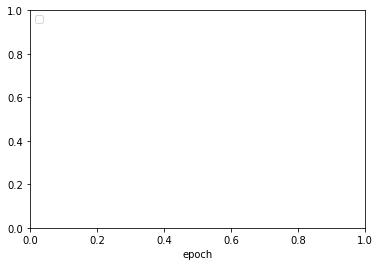

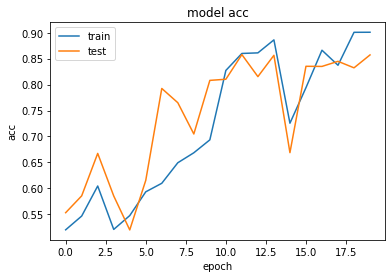

In [67]:
print(history.history.keys())
# summarize history for accuracy
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


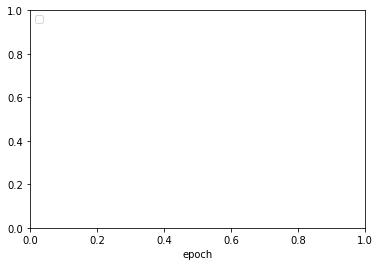

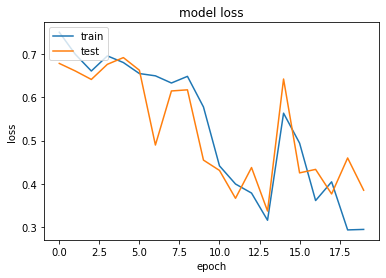

In [68]:
print(history.history.keys())
# summarize history for accuracy
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
j = 0
i = 0
samples_t = []
labels = []
ZX_train = []
while j<2000:
    
    try:
        z = codecs.open(f"/home/hamidraei/AMAZON/test/{i}", 'r', encoding='utf-8')
        content = z.read()
        content = content[:800]
        samples_t.append(content)
        
        kar = True
        j+=1
        i+=1
        for line1 in z:
            
            word = line1.split()
            a = get_w2v(line1, model_1)
        #print(len(word))
        #print(a.shape)
        #print(line1)
            #i+=1
            v, h = a.shape
            if v>200:
                a = a[0:200, :]
            if v<200:
                zg = np.zeros((200-v,100 ))
                a = np.concatenate((a, zg), axis=0)
            X_train.append(a)

    except:
        kar = False
        i+=1
        
    print(f"j is{j}") 
    #print(i)
    

j is1
j is2
j is3
j is4
j is5
j is6
j is7
j is8
j is9
j is10
j is11
j is12
j is13
j is14
j is15
j is16
j is17
j is18
j is19
j is20
j is21
j is22
j is23
j is24
j is25
j is26
j is27
j is28
j is29
j is30
j is31
j is32
j is33
j is34
j is35
j is36
j is37
j is38
j is39
j is40
j is41
j is42
j is43
j is44
j is45
j is46
j is47
j is48
j is49
j is50
j is51
j is52
j is53
j is54
j is55
j is56
j is57
j is58
j is59
j is60
j is61
j is62
j is63
j is64
j is65
j is66
j is67
j is68
j is69
j is70
j is71
j is72
j is73
j is74
j is75
j is76
j is77
j is78
j is79
j is80
j is81
j is82
j is83
j is84
j is85
j is86
j is87
j is88
j is89
j is90
j is91
j is92
j is93
j is94
j is95
j is96
j is97
j is98
j is99
j is100
j is101
j is102
j is103
j is104
j is105
j is106
j is107
j is108
j is109
j is110
j is111
j is112
j is113
j is114
j is115
j is116
j is117
j is118
j is119
j is120
j is121
j is122
j is123
j is124
j is125
j is126
j is127
j is128
j is129
j is130
j is131
j is132
j is133
j is134
j is135
j is136
j is137
j is138
j is

j is1438
j is1439
j is1440
j is1441
j is1442
j is1443
j is1444
j is1445
j is1446
j is1447
j is1448
j is1449
j is1450
j is1451
j is1452
j is1453
j is1454
j is1455
j is1456
j is1457
j is1458
j is1459
j is1460
j is1461
j is1462
j is1463
j is1464
j is1465
j is1466
j is1467
j is1468
j is1469
j is1470
j is1471
j is1472
j is1473
j is1474
j is1475
j is1476
j is1477
j is1478
j is1479
j is1480
j is1481
j is1482
j is1483
j is1484
j is1485
j is1486
j is1487
j is1488
j is1489
j is1490
j is1491
j is1492
j is1493
j is1494
j is1495
j is1496
j is1497
j is1498
j is1499
j is1500
j is1501
j is1502
j is1503
j is1504
j is1505
j is1506
j is1507
j is1508
j is1509
j is1510
j is1511
j is1512
j is1513
j is1514
j is1515
j is1516
j is1517
j is1518
j is1519
j is1520
j is1521
j is1522
j is1523
j is1524
j is1525
j is1526
j is1527
j is1528
j is1529
j is1530
j is1531
j is1532
j is1533
j is1534
j is1535
j is1536
j is1537
j is1538
j is1539
j is1540
j is1541
j is1542
j is1543
j is1544
j is1545
j is1546
j is1547
j is1548
j

In [70]:
len(samples_t)

2000

In [71]:
test_samples = samples_t

In [72]:
x_test = vectorizer(np.array([[s] for s in test_samples])).numpy()
x_val = vectorizer(np.array([[s] for s in val_samples])).numpy()

y_train = np.array(train_labels)
y_val = np.array(val_labels)

In [73]:
Y_Test = model.predict(x_test)

In [236]:
y_train[6]

array([0])

In [74]:
Y = model.predict(x_train)

In [75]:
np.average(Y_Test[1])

0.052372724

In [76]:
Y = []
for i in range(2000):
    w = np.average(Y_Test[i])
    if w>0.5 or w==0.5:
        Y.append(1)
    else:
        Y.append(0)
        

In [77]:
Y = np.array(Y)

In [78]:
ID = []
for i in range(2000):
    ID.append(i)


ID = np.array(ID)

In [79]:
import pandas as pd

In [80]:
test_data = {}

In [81]:
test_data['sentiment'] = pd.Series(Y.reshape(1, -1)[0])
test_data['id'] = pd.Series(ID.reshape(1, -1)[0])


In [82]:
submission = pd.concat([test_data['id'], test_data['sentiment']], axis=1)
submission.to_csv('submission_17.csv', index=False)

In [249]:
y_train[0]

array([1])

In [251]:
j = 0
for i in range(1600):
    if y_train[i]==0:
        j+=1
print(j)

801
